In [1]:
from models.model import UNET
import numpy as np
from torch import nn
import torch
import torch.nn.functional as F
import imageio
from tqdm import tqdm
from pytorch_lightning import Trainer
import pytorch_lightning as pl
from matplotlib import pyplot as plt
import torchvision
from src.data.data_utils import get_slice_idxs, slice_image, unslice_images
from src.models.predict_model import SegmentImage

In [2]:
predict = SegmentImage(UNET, "../models/checkpoints/epoch=99-step=55200.ckpt")
image_path = "../data/raw/images/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0.2500.png"
mask_path = "../data/raw/masks/TCGA-A2-A0D0-DX1_xmin68482_ymin39071_MPP-0.2500.png"
image = torchvision.io.read_image(image_path).to(torch.float) / 255.0
mask = torchvision.io.read_image(mask_path).to(torch.int)
mask[mask > 4] = 5
pred = predict(image)

100%|██████████| 210/210 [00:51<00:00,  4.06it/s]


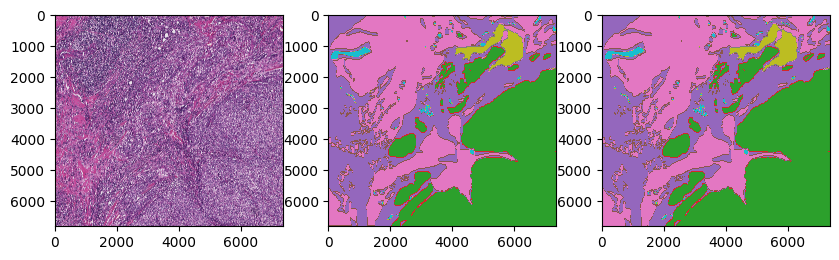

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(torch.moveaxis(image, 0, -1))
ax[1].imshow(mask[0], cmap="tab10", vmin=0, vmax=5)
ax[2].imshow(pred, cmap="tab10", vmin=0, vmax=5)
plt.show()